# Linear regression by gradient descent 
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

## import libraries

In [1]:
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm

## simulate a data set (single feature)

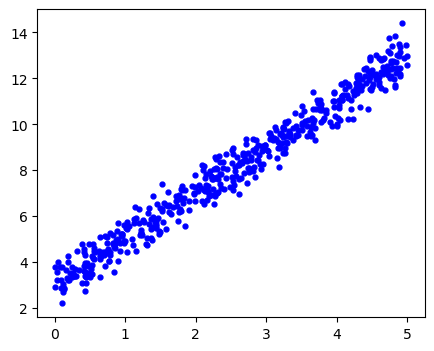

In [2]:
n_1 = 500 # number of examples

x = np.random.uniform(0,5,n_1); # feature
x = np.sort(x); 

y = 3 + 2 * x  # true beta0 = 3, true beta1 = 2
y = y + 0.5 * np.random.randn(n_1)  # add Gaussian noise

x = np.reshape(x,[-1,1]) # change to column form
y = np.reshape(y,[-1,1])

plt.figure(figsize=(5,4))
plt.plot(x,y,'b.', markersize=7)

## linear regression by the exact method

[3.04428094] [[1.98765895]]


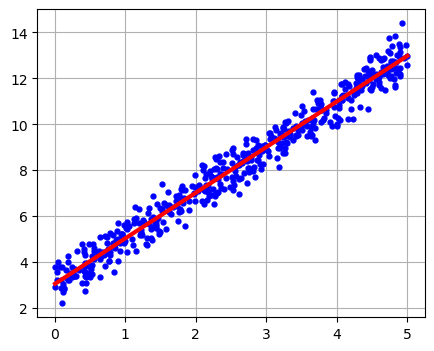

In [3]:
LRmodel = LinearRegression().fit(x, y)  # fit a linear reg model with intercept

beta0 = LRmodel.intercept_    # beta_0
beta1 = LRmodel.coef_         # beta_1

print(beta0,beta1)

yhat = LRmodel.predict(x)     # fitted values

plt.figure(figsize=(5,4))
plt.plot(x,y,'b.', markersize=7)
plt.plot(x,yhat,'r-', linewidth=3)
plt.grid('on')

## (1) Display level sets of the objective function (training MSE). Remember to set the limits of the variables by centering around their true values

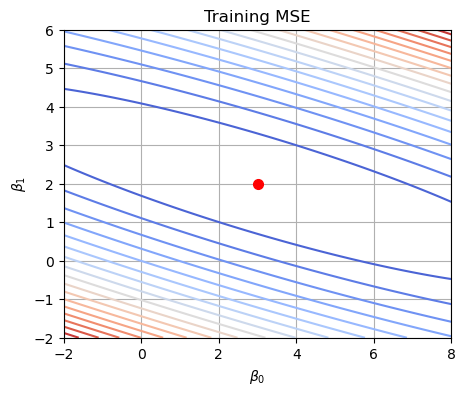

In [4]:
n = 300

beta0 = np.linspace(-2,8,n)
beta1 = np.linspace(-2,6,n)
B0, B1 = np.meshgrid(beta0, beta1)

MSE = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        yhat = B0[i,j] + B1[i,j] * x
        MSE[i,j] = np.mean((y - yhat)**2)

plt.figure(figsize=(5,4))
plt.contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
plt.plot(3,2,'ro', markersize=7)
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.title('Training MSE')
plt.grid('on')

## Plotting graph function to help with plotting graphs for each problem. (Essentially plotting parts 2-4)

In [5]:
def plot_graphs(etavalues, function, colors, **kwargs):
    if function.__name__ == 'backtracking_gradient_descent':
        # If the function is backtracking_gradient_descent, plot an additional graph for learning rates
        fig, axs = plt.subplots(len(etavalues), 4, figsize=(20, 5 * len(etavalues)))
    else:
        fig, axs = plt.subplots(len(etavalues), 3, figsize=(15, 5 * len(etavalues)))

    B0, B1, MSE = kwargs.get('B0'), kwargs.get('B1'), kwargs.get('MSE')
    
    # If B0, B1, and MSE are not provided, calculate them. Used for plotting the contour plot
    if any(v is None for v in [B0, B1, MSE]):
        n = 300
        x = kwargs.get('x')
        y = kwargs.get('y')
        beta0 = np.linspace(-2, 8, n)
        beta1 = np.linspace(-2, 6, n)
        B0, B1 = np.meshgrid(beta0, beta1)

        MSE = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                yhat = B0[i, j] + B1[i, j] * x
                MSE[i, j] = np.mean((y - yhat)**2)
        kwargs['B0'], kwargs['B1'], kwargs['MSE'] = B0, B1, MSE

    # Plot the convergence graph
    def plot_convergence(return_vals, ax, color):
        mse = return_vals[2]
        ax.plot(mse, f'{color}-', linewidth=3)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Training MSE')
        ax.set_title('Learning rate = ' + str(eta))
        ax.grid('on')

    # Plot the trajectory graph
    def plot_trajectory(return_vals, ax, color):
        beta0s, beta1s = return_vals[0], return_vals[1]

        ax.contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
        ax.plot(beta0s, beta1s, f'{color}-', linewidth=2, marker='o', markerfacecolor='b', markersize=6)
        ax.set_xlabel(r'$\beta_0$')
        ax.set_ylabel(r'$\beta_1$')
        ax.set_title('Learning rate = ' + str(eta))
        ax.plot(3, 2, 'ro', markersize=7)
        ax.grid('on')

    # Plot the learning graph
    def plot_line_best_fit(return_vals, ax, color):
        beta0s, beta1s = return_vals[0], return_vals[1]

        x = kwargs.get('x')
        y = kwargs.get('y')
        n_iter = kwargs.get('n_iter')
        for i in range(n_iter):
            yhat = beta0s[i] + beta1s[i] * x
            ax.plot(x, y, 'b.', markersize=3)
            if i == n_iter - 1:
                ax.plot(x, yhat, f'y-', linewidth=2)
            else:
                ax.plot(x, yhat, f'{color}-', linewidth=2)
            ax.set_title('Learning rate = ' + str(eta))
            ax.grid('on')
        # Calculate the final R^2 value
        yhat = beta0s[-1] + beta1s[-1] * x
        ybar = np.mean(y)
        SS_tot = np.sum((y - ybar)**2)
        SS_res = np.sum((y - yhat)**2)
        R2 = 1 - SS_res / SS_tot
        # Add R2 as a legend to the plot
        ax.legend([f'R^2 = {R2:.2f}'])

    def plot_learning_rates(return_vals, ax, color):
        learning_rates = return_vals[3]

        ax.plot(learning_rates, f'{color}-', linewidth=2)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Learning Rate')
        ax.set_title('Learning rate = ' + str(eta))
        ax.grid('on')

    # Plot the graphs for each learning rate
    for idx, (eta, color) in enumerate(zip(etavalues, colors)):
        return_vals = function(eta=eta, **kwargs)
        plot_convergence(return_vals=return_vals, ax=axs[idx, 0], color=color)
        plot_trajectory(return_vals=return_vals, ax=axs[idx, 1], color=color)
        plot_line_best_fit(return_vals=return_vals, ax=axs[idx, 2], color=color)
        if function.__name__ == 'backtracking_gradient_descent':
            plot_learning_rates(return_vals=return_vals, ax=axs[idx, 3], color=color)

    fig.tight_layout()
    fig.suptitle('Comparison of different learning rates for ' + function.__name__, fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

In [6]:
def calibrate_countour_plot(x, y, b0_range=(-2,8), b1_range=(-2,6), n=300):
    beta0 = np.linspace(b0_range[0], b0_range[1], n)
    beta1 = np.linspace(b1_range[0], b1_range[1], n)
    B0, B1 = np.meshgrid(beta0, beta1)

    MSE = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            yhat = B0[i,j] + B1[i,j] * x
            MSE[i,j] = np.mean((y - yhat)**2)
    return B0, B1, MSE

## (2) Implement linear regression by gradient descent, try different values for the learning rate parameter $\eta$ (such as 0.05, 0.1, 0.2) and display the f-convergence curves. When the curve converges, what should the limit of the curve be?

In [7]:
def gradient_descent(x, y, eta, beta0=0, beta1=0, **kwargs):
    n_iter = kwargs.get('n_iter', 100)
    
    mse = np.zeros(n_iter)
    beta0s = np.zeros(n_iter)
    beta1s = np.zeros(n_iter)

    beta0s[0] = beta0
    beta1s[0] = beta1
    mse[0] = np.mean((y - (beta0 + beta1 * x))**2)
    for i in range(n_iter):
        yhat = beta0 + beta1 * x
        
        grad_beta0 = -2 * np.mean(y - yhat)
        grad_beta1 = -2 * np.mean((y - yhat) * x)

        beta0 = beta0 - eta * grad_beta0
        beta1 = beta1 - eta * grad_beta1

        mse[i] = np.mean((y - yhat)**2)
        beta0s[i] = beta0
        beta1s[i] = beta1
    return (beta0s, beta1s, mse)

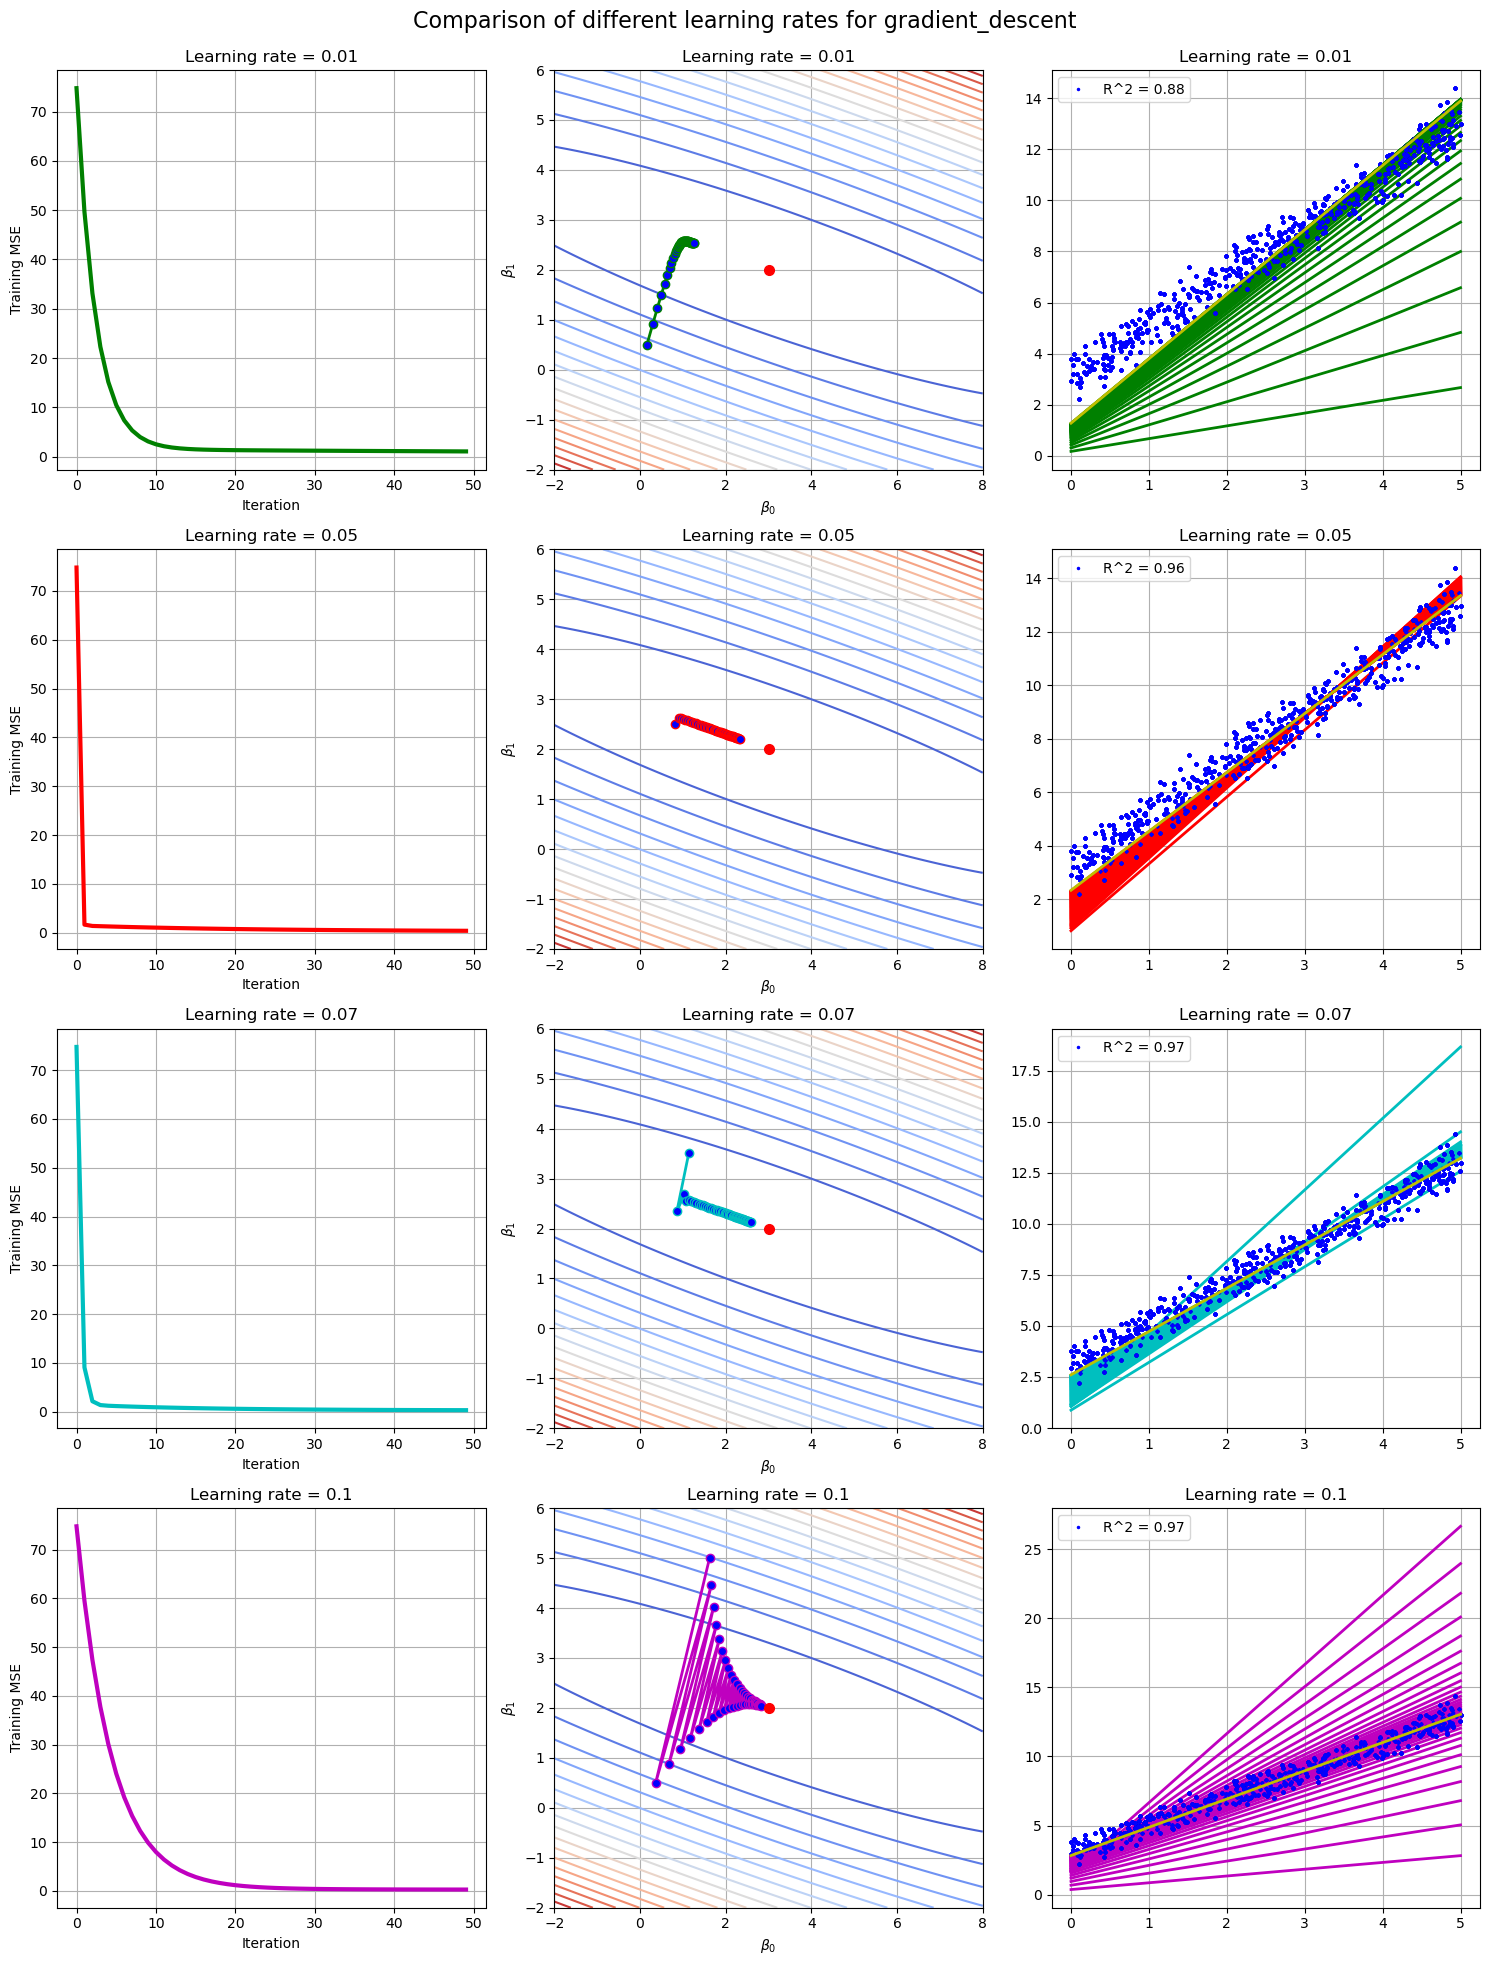

In [8]:
eta_values = [0.01, 0.05, 0.07, 0.1]
colors = ['g', 'r', 'c', 'm']
n_iter = 50

B0, B1, MSE = calibrate_countour_plot(x, y)
plot_graphs(eta_values, gradient_descent, colors, n_iter=n_iter, beta0=0, beta1=0, x=x, y=y, B0=B0, B1=B1, MSE=MSE)

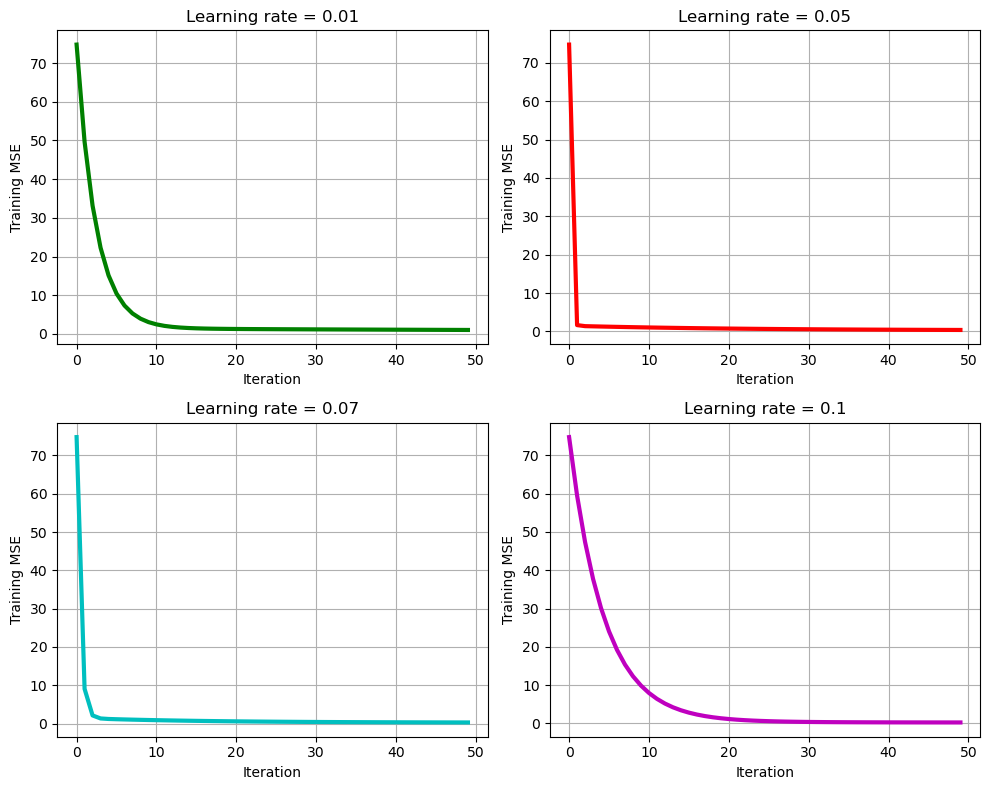

In [9]:
eta_values = [0.01, 0.05, 0.07, 0.1]
n_iter = 50

colors = ['g', 'r', 'c', 'm']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for idx, (eta, color) in enumerate(zip(eta_values, colors)):
    beta0 = 0
    beta1 = 0
    beta0, beta1, mse = gradient_descent(x=x, y=y, eta=eta, n_iter=n_iter, beta0=beta0, beta1=beta1)
    axs[idx].plot(mse, f'{color}-', linewidth=3)
    axs[idx].set_xlabel('Iteration')
    axs[idx].set_ylabel('Training MSE')
    axs[idx].set_title('Learning rate = ' + str(eta))
    axs[idx].grid('on')

plt.tight_layout()
plt.show()

## (3) Display the trajectory of gradient descent on top of level sets, for the different values of $\eta$

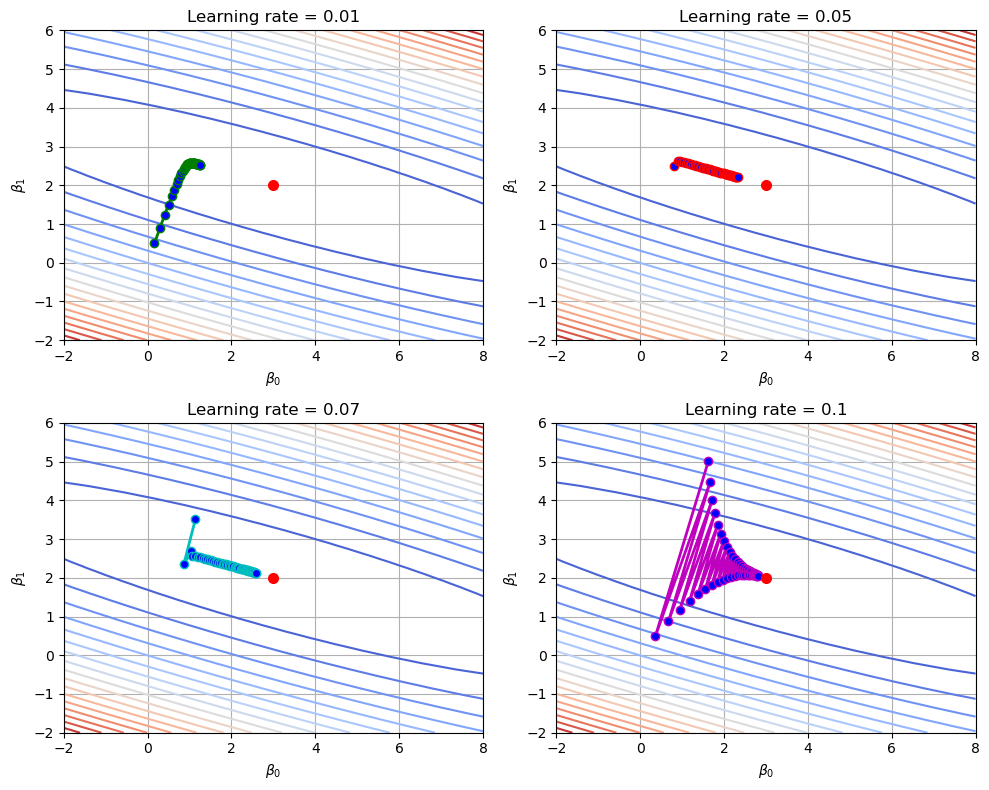

In [10]:
n = 50

beta0 = np.linspace(-2,8,n)
beta1 = np.linspace(-2,6,n)
B0, B1 = np.meshgrid(beta0, beta1)

MSE = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        yhat = B0[i,j] + B1[i,j] * x
        MSE[i,j] = np.mean((y - yhat)**2)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

eta_values = [0.01, 0.05, 0.07, 0.1]
colors = ['g', 'r', 'c', 'm']

for idx, (eta, color) in enumerate(zip(eta_values, colors)):
    beta0 = 0
    beta1 = 0
    beta0s, beta1s, mse = gradient_descent(x=x, y=y, eta=eta, n_iter=n_iter, beta0=beta0, beta1=beta1)
    axs[idx].contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
    axs[idx].plot(beta0s, beta1s, f'{color}-', linewidth=2, marker='o', markerfacecolor='b', markersize=6)
    axs[idx].set_xlabel(r'$\beta_0$')
    axs[idx].set_ylabel(r'$\beta_1$')
    axs[idx].set_title('Learning rate = ' + str(eta))
    axs[idx].plot(3,2,'ro', markersize=7)
    axs[idx].grid('on')

plt.tight_layout()
plt.show()

## (4) Display the fitted lines (on top of data) at every step of gradient descent, with the best learning rate found above

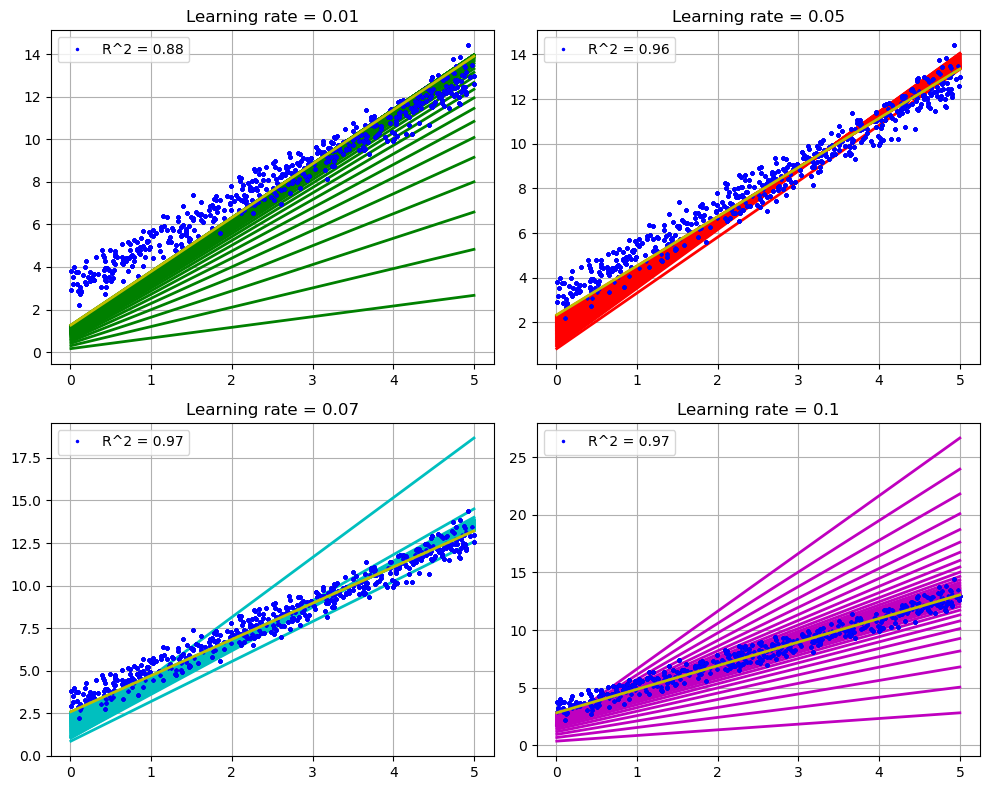

In [11]:
eta_values = [0.01, 0.05, 0.07, 0.1]
n_iter = 50

colors = ['g', 'r', 'c', 'm']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for idx, (eta, color) in enumerate(zip(eta_values, colors)):
    beta0 = 0
    beta1 = 0
    beta0s, beta1s, mse = gradient_descent(x=x, y=y, eta=eta, n_iter=n_iter, beta0=beta0, beta1=beta1)
    for i in range(n_iter):
        yhat = beta0s[i] + beta1s[i] * x
        axs[idx].plot(x, y, 'b.', markersize=3)
        if(i == n_iter - 1):
            axs[idx].plot(x, yhat, f'y-', linewidth=2)
        else:
            axs[idx].plot(x, yhat, f'{color}-', linewidth=2)
        axs[idx].set_title('Learning rate = ' + str(eta))
        axs[idx].grid('on')
    # Calculate the final R^2 value
    yhat = beta0s[-1] + beta1s[-1] * x
    ybar = np.mean(y)
    SS_tot = np.sum((y - ybar)**2)
    SS_res = np.sum((y - yhat)**2)
    R2 = 1 - SS_res / SS_tot
    # Add R2 as a legend to the plot
    axs[idx].legend([f'R^2 = {R2:.2f}'])

plt.tight_layout()
plt.show()

## (5) Implement the backtracking line search method (https://www.cs.cmu.edu/~ggordon/10725-F12/slides/05-gd-revisited.pdf) for using adapative learning rates at different steps, and redo parts (2)-(4). Does it seem to improve the speed of convergence over a constant learning rate?

In [12]:
n_1 = 500 # number of examples

x = np.random.uniform(0,5,n_1); # feature
x = np.sort(x); 

y = 3 + 2 * x  # true beta0 = 3, true beta1 = 2
y = y + 0.5 * np.random.randn(n_1)  # add Gaussian noise

x = np.reshape(x,[-1,1]) # change to column form
y = np.reshape(y,[-1,1])

In [13]:
def compute_gradient(x, y, beta):
    yhat = beta[0] + beta[1] * x
    grad = np.zeros(2)
    grad[0] = -2 * np.mean(y - yhat)
    grad[1] = -2 * np.mean((y - yhat) * x)
    return grad

def compute_mse(x, y, beta):
    yhat = beta[0] + beta[1] * x
    return np.mean((y - yhat)**2)

In [14]:
def backtracking_gradient_descent(x, y, eta=0.8, beta0=0, beta1=0, **kwargs):
    n_iter = kwargs.get('n_iter', 100)
    alpha = kwargs.get('alpha', 0.5)

    mse = np.zeros(n_iter)
    beta0s = np.zeros(n_iter)
    beta1s = np.zeros(n_iter)
    learning_rates = []

    beta0s[0] = beta0
    beta1s[0] = beta1
    mse[0] = compute_mse(x, y, [beta0, beta1])
    learning_rates.append(1.0)  # Initial learning rate

    for i in range(1, n_iter):
        grad = compute_gradient(x, y, [beta0, beta1])
        grad_beta0, grad_beta1 = grad[0], grad[1]
        norm_grad = np.linalg.norm(grad)

        t = 1.0  # Start with t = 1
        while True:
            beta0_new = beta0 - t * grad_beta0
            beta1_new = beta1 - t * grad_beta1
            new_mse = compute_mse(x, y, [beta0_new, beta1_new])

            # if new_mse <= mse[i-1] - (t / 2) * norm_grad**2:
            if new_mse <= mse[i-1] - alpha * t * norm_grad**2:
                break
            t *= eta  # Update t = βt

        learning_rates.append(t)

        beta0 = beta0_new
        beta1 = beta1_new

        mse[i] = new_mse
        beta0s[i] = beta0
        beta1s[i] = beta1
        # print(f'Iteration: {i}, MSE: {mse[i]}, t: {t}')

    return (beta0s, beta1s, mse, learning_rates)

In [15]:
beta0s, beta1s, mse, learning_rates = backtracking_gradient_descent(x, y, eta=0.8, beta0=0, beta1=0, n_iter=100)

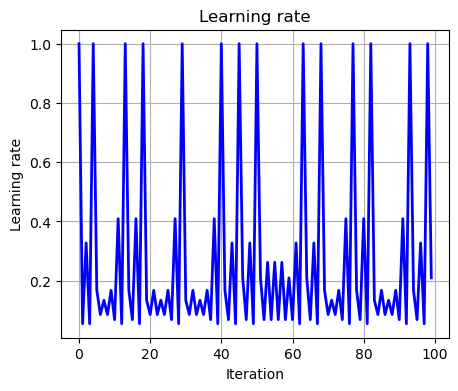

In [16]:
# plot the learning rates

plt.figure(figsize=(5,4))
plt.plot(learning_rates,'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.title('Learning rate')

plt.grid('on')

plt.show()

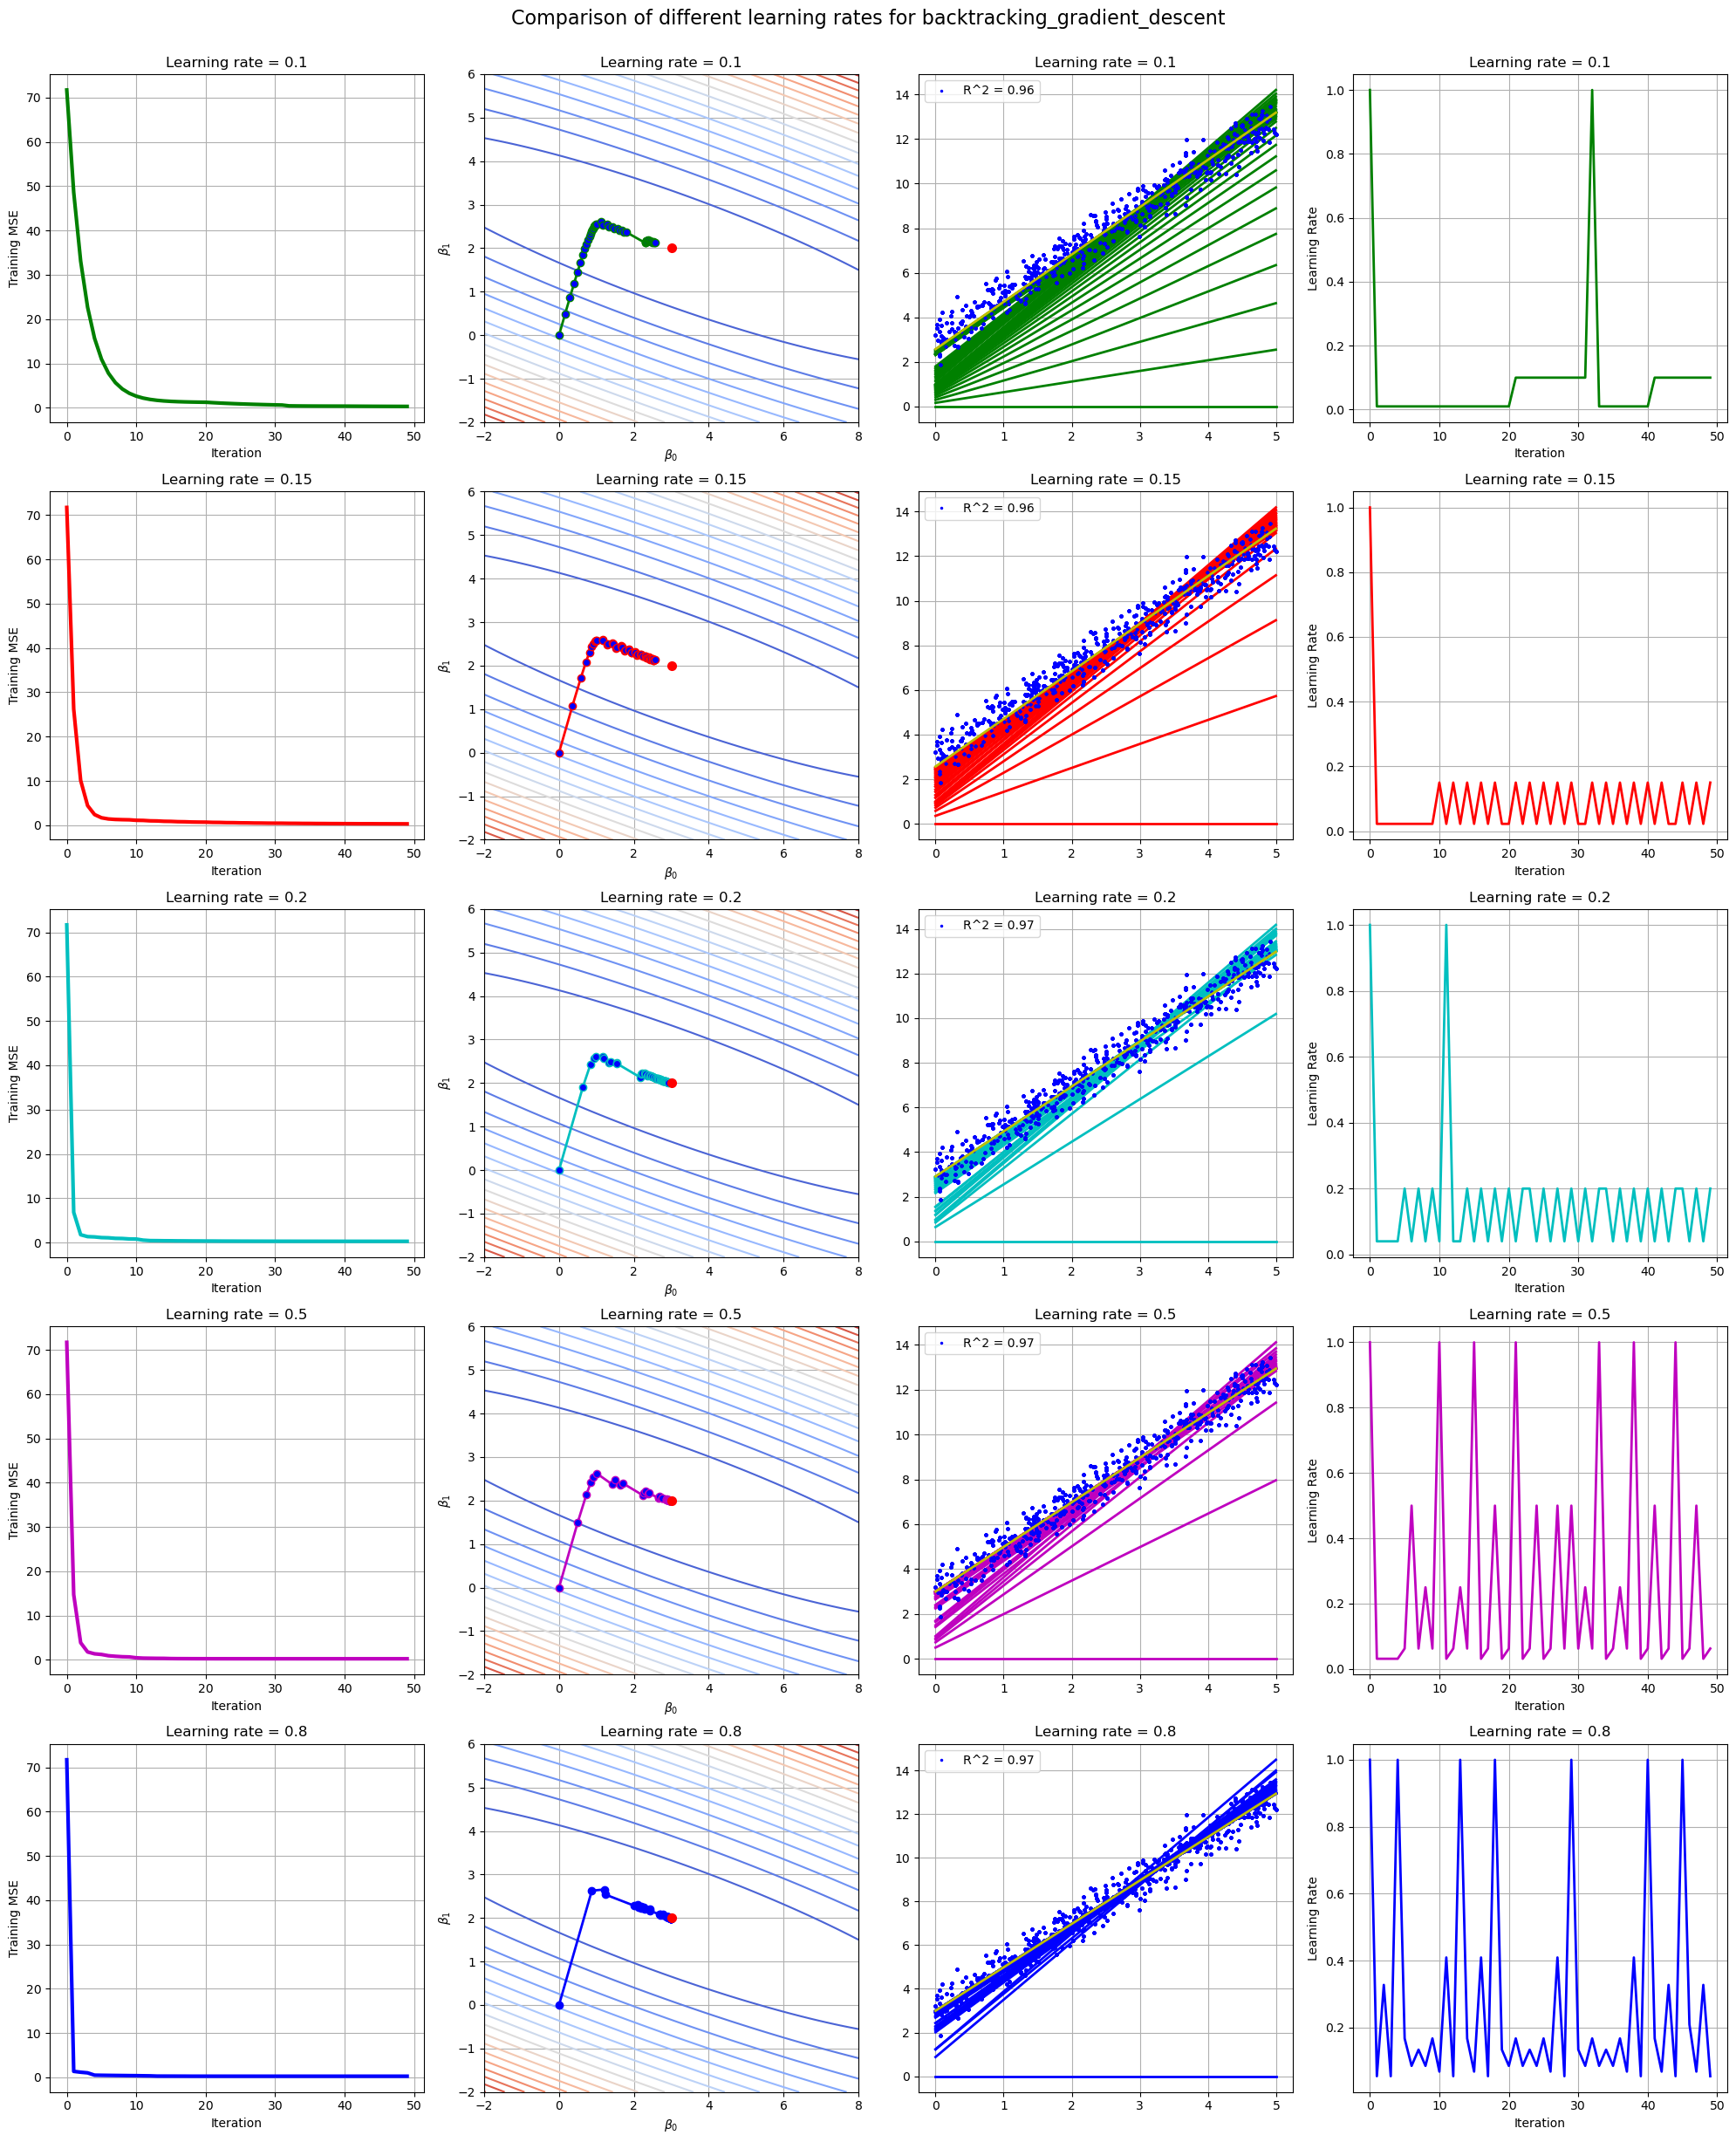

In [17]:
eta_values = [0.1, 0.15, 0.2, 0.5, 0.8]
colors = ['g', 'r', 'c', 'm', 'b']
n_iter = 50

B0, B1, MSE = calibrate_countour_plot(x, y)
plot_graphs(eta_values, backtracking_gradient_descent, colors, n_iter=n_iter, beta0=0, beta1=0, x=x, y=y, B0=B0, B1=B1, MSE=MSE)

## (6) Implement stochastic gradident descent (with a fixed learning rate) and make the same plots as in Parts (2)-(4).


In [18]:
def stochastic_gradient_descent(x, y, eta, beta0=0, beta1=0, **kwargs):
    T = kwargs.get('T', 100)
    mini_batches = kwargs.get('mini_batches', 10)
    
    mse_list = []
    beta0s = []
    beta1s = []

    beta0s.append(beta0)
    beta1s.append(beta1)

    n = len(y)
    batch_size = n // mini_batches

    for t in range(T):
        # Shuffle the data
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(mini_batches):
            start = i * batch_size
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Compute predictions
            y_pred = beta0 + beta1 * x_batch

            # Compute gradients
            error = y_pred - y_batch
            gradient_beta0 = 2 * np.mean(error)
            gradient_beta1 = 2 * np.mean(error * x_batch)

            # Update parameters
            beta0 -= eta * gradient_beta0
            beta1 -= eta * gradient_beta1

        # Store parameters
        beta0s.append(beta0)
        beta1s.append(beta1)

        # Compute and store MSE
        y_pred_full = beta0 + beta1 * x
        mse = np.mean((y - y_pred_full) ** 2)
        mse_list.append(mse)

    return (beta0s, beta1s, mse_list)

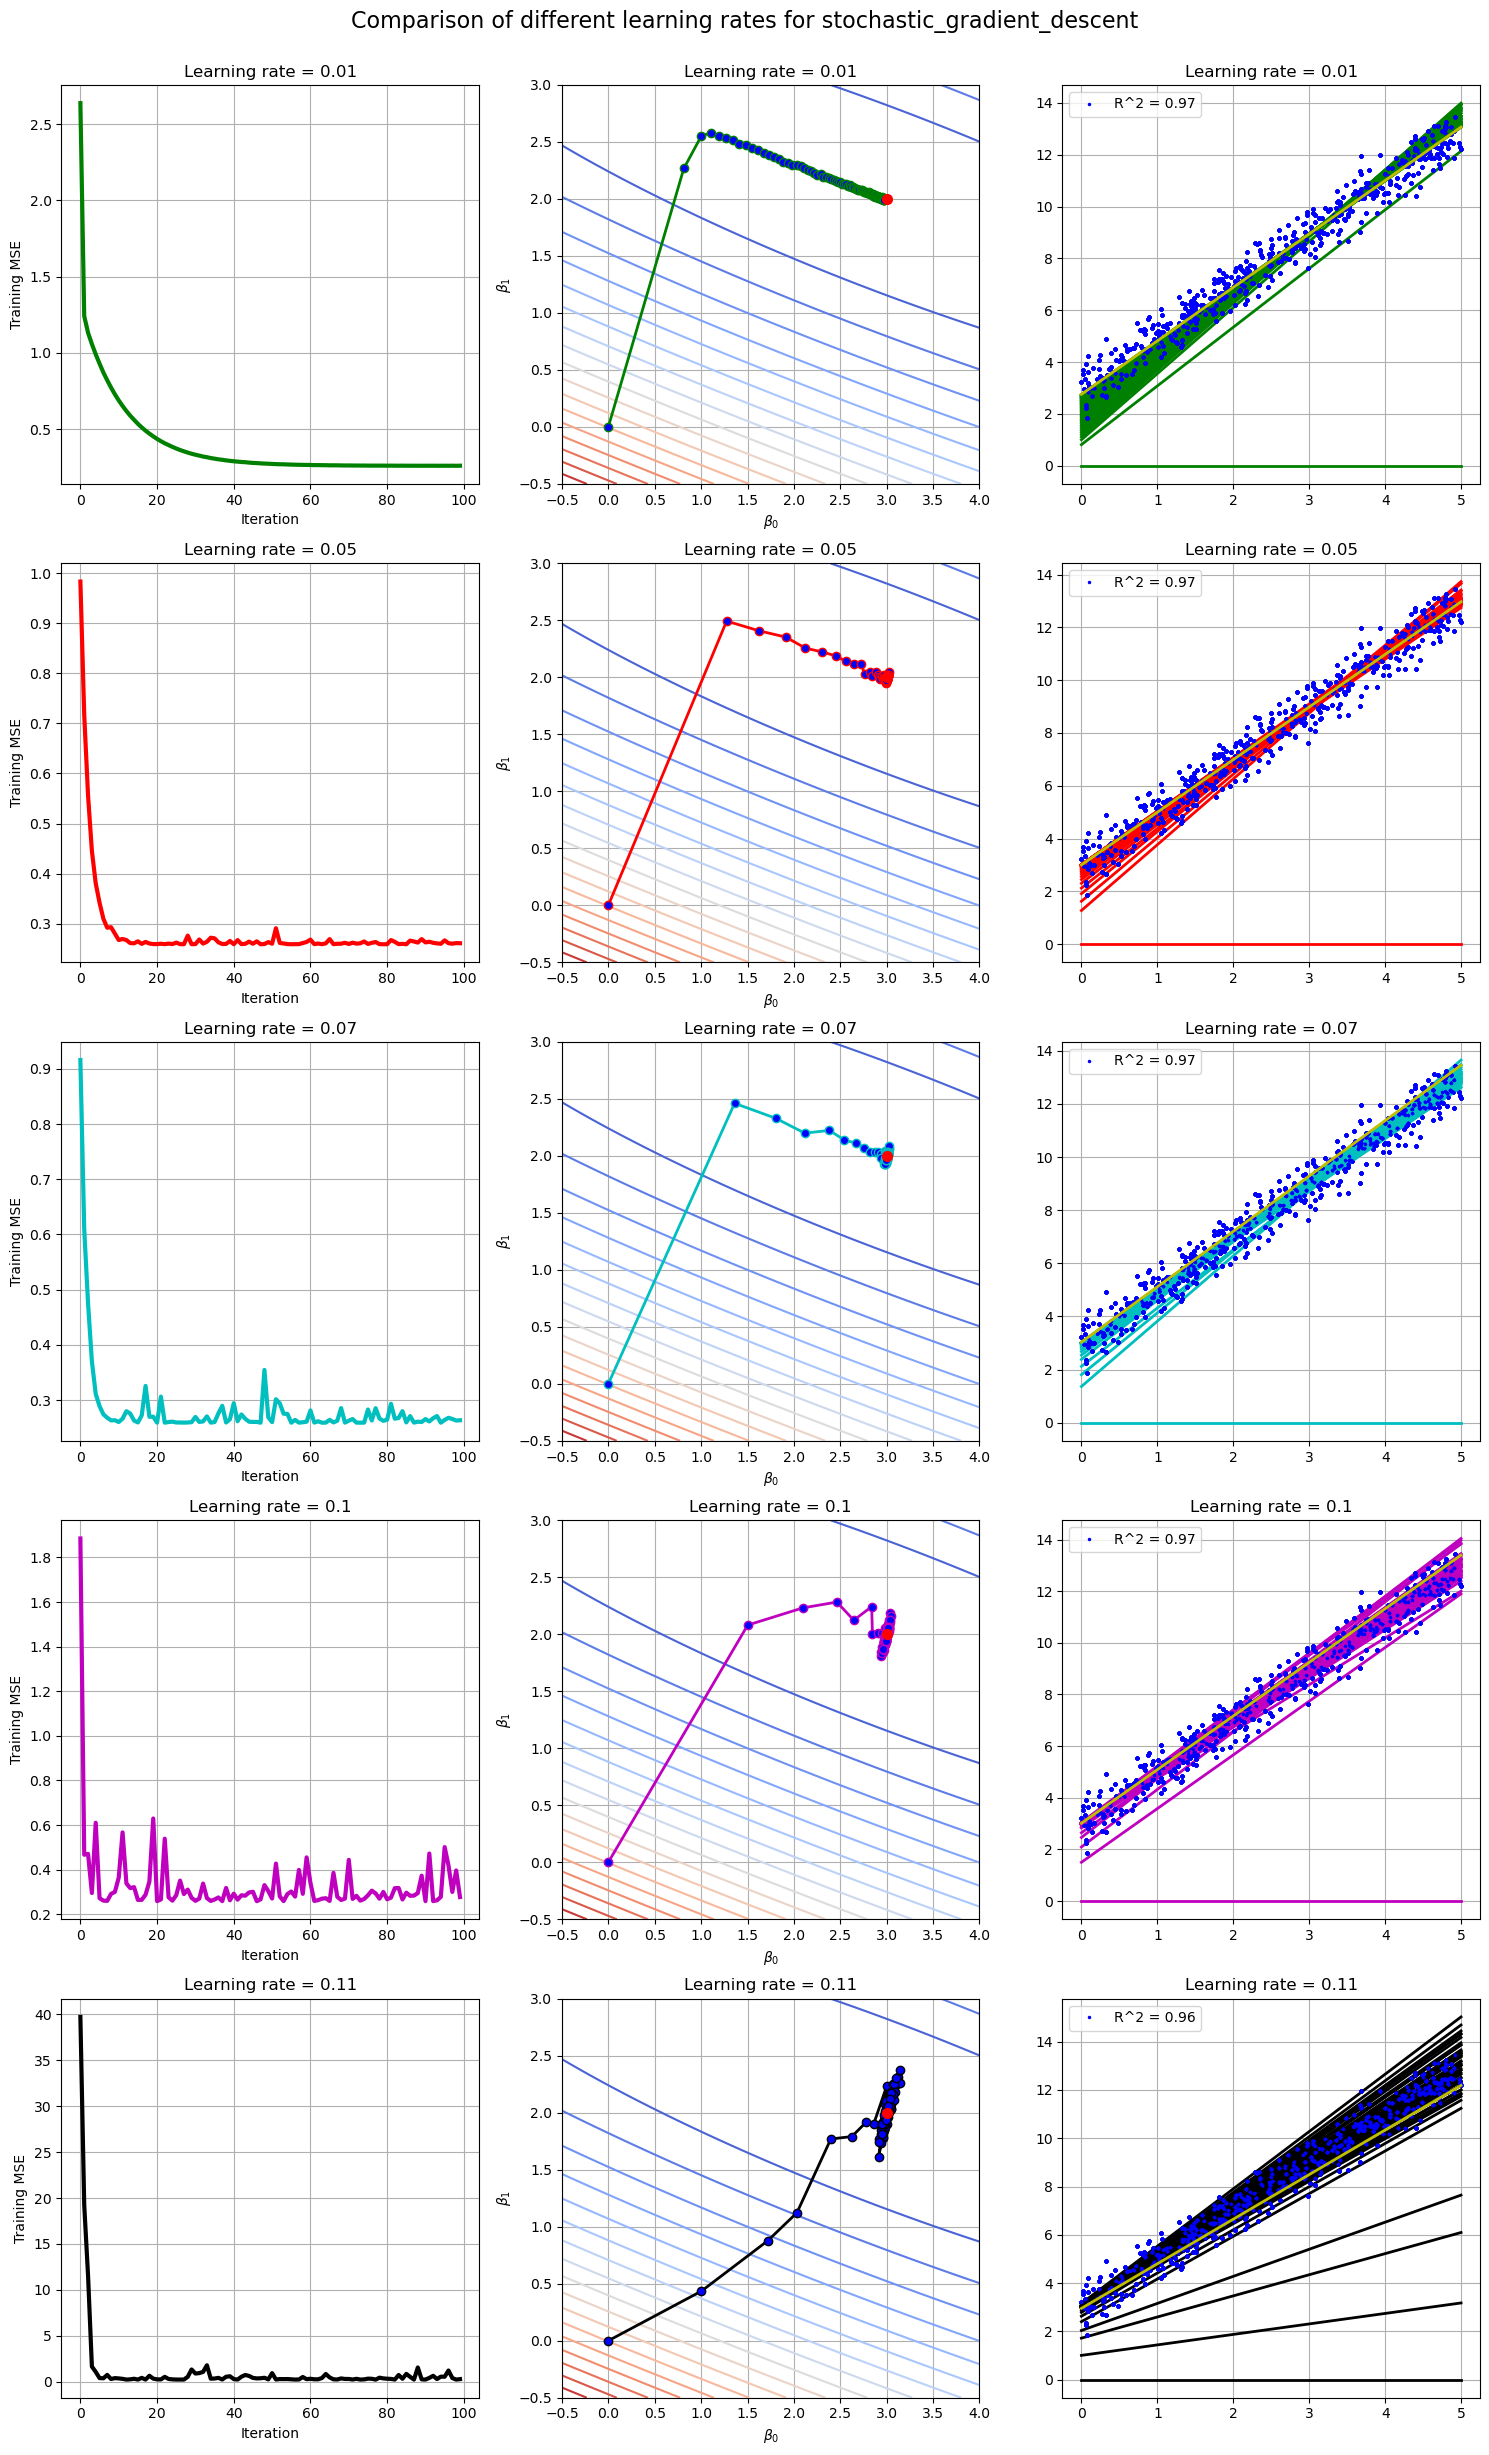

In [19]:
eta_values = [0.01, 0.05, 0.07, 0.1, 0.11]
# eta_values = [0.1, 0.15, 0.2, 0.5, 0.8]
colors = ['g', 'r', 'c', 'm', 'k']
n_iter = 50

B0, B1, MSE = calibrate_countour_plot(x, y, b0_range=(-0.5, 4), b1_range=(-0.5, 3))
plot_graphs(eta_values, stochastic_gradient_descent, colors, n_iter=n_iter, beta0=0, beta1=0, x=x, y=y, T=100, mini_batches=10, B0=B0, B1=B1, MSE=MSE)

## Compare results from Backtracking Algorithm and SGD algorithm

In [20]:
# Compare the elbow points of the two algorithms with the kneed library
from kneed import KneeLocator

eta_values = [0.01, 0.05, 0.07, 0.1]

for eta in eta_values:
    beta0s_backtracking, beta1s_backtracking, mse_backtracking, learning_rates = backtracking_gradient_descent(x=x, y=y, eta=eta, n_iter=100, beta0=0, beta1=0)
    beta0s_sgd, beta1s_sgd, mse_sgd = stochastic_gradient_descent(x=x, y=y, eta=eta, T=100, mini_batches=10, beta0=0, beta1=0)

    kneedle_backtracking = KneeLocator(range(len(mse_backtracking)), mse_backtracking, S=1.0, curve='convex', direction='decreasing')
    kneedle_sgd = KneeLocator(range(len(mse_sgd)), mse_sgd, S=1.0, curve='convex', direction='decreasing')

    print('Elbow point for Backtracking Algorithm with learning rate', eta, ':', kneedle_backtracking.knee)
    print('Elbow point for SGD Algorithm with learning rate', eta, ':', kneedle_sgd.knee)
    bt_r2_perc = (1 - mse_backtracking[-1] / np.var(y)) * 100
    sgd_r2_perc = (1 - mse_sgd[-1] / np.var(y)) * 100
    print('R^2 value for Backtracking Algorithm with learning rate', eta, ': %.4f%%' % bt_r2_perc)
    print('R^2 value for SGD Algorithm with learning rate', eta, ': %.4f%%' % sgd_r2_perc)
    print('\n\n')

Elbow point for Backtracking Algorithm with learning rate 0.01 : 9
Elbow point for SGD Algorithm with learning rate 0.01 : 15
R^2 value for Backtracking Algorithm with learning rate 0.01 : 96.7711%
R^2 value for SGD Algorithm with learning rate 0.01 : 96.8253%



Elbow point for Backtracking Algorithm with learning rate 0.05 : 1
Elbow point for SGD Algorithm with learning rate 0.05 : 9
R^2 value for Backtracking Algorithm with learning rate 0.05 : 96.8274%
R^2 value for SGD Algorithm with learning rate 0.05 : 96.7716%



Elbow point for Backtracking Algorithm with learning rate 0.07 : 16
Elbow point for SGD Algorithm with learning rate 0.07 : 8
R^2 value for Backtracking Algorithm with learning rate 0.07 : 96.8141%
R^2 value for SGD Algorithm with learning rate 0.07 : 96.8269%



Elbow point for Backtracking Algorithm with learning rate 0.1 : 9
Elbow point for SGD Algorithm with learning rate 0.1 : 2
R^2 value for Backtracking Algorithm with learning rate 0.1 : 96.8255%
R^2 value for S